<a href="https://colab.research.google.com/github/Easha-Noor/Breast-Cancer-detection-model/blob/main/Breast_Cancer_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import all needed libraries and sublibraries

import tensorflow as tf

import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import keras

import numpy as np

from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras import regularizers

import pandas as pd

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'




In [ ]:
# Import input (x) and output (y) data, and asign these to df1 and df2

from google.colab import files
files.upload()
df1 = pd.read_csv('X_data for breast cancer model.csv')

df2 = pd.read_csv('Y_data for breast cancer model.csv')

Saving X_data for breast cancer model.csv to X_data for breast cancer model.csv
Saving Y_data for breast cancer model.csv to Y_data for breast cancer model.csv


In [ ]:
# Scale input data

df1 = preprocessing.scale(df1)


In [ ]:
# Split the data into input (x) training and testing data, and ouput (y) training and testing data, 
# with training data being 80% of the data, and testing data being the remaining 20% of the data
X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size=0.2)


In [18]:
# defining the model
model = Sequential()
model.add(Dense(13, input_shape= (30,), activation = 'relu'))
model.add(Dense(1,activation ='sigmoid'))
model.compile(loss= 'binary_crossentropy', optimizer= Adam(lr= 0.001), metrics= ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [20]:
#setting parametrs
earlystopper= EarlyStopping(monitor= 'val_loss', min_delta= 0, patience=15, verbose= 1, mode= 'auto')
#fitting model over 2000 iteration
history = model.fit(X_train, y_train, epochs = 2000, validation_split= 0.15, verbose= 0, callbacks=[earlystopper])
history_dict=history.history


Epoch 85: early stopping


Text(0.5, 0, 'Epochs')

<Figure size 432x288 with 0 Axes>

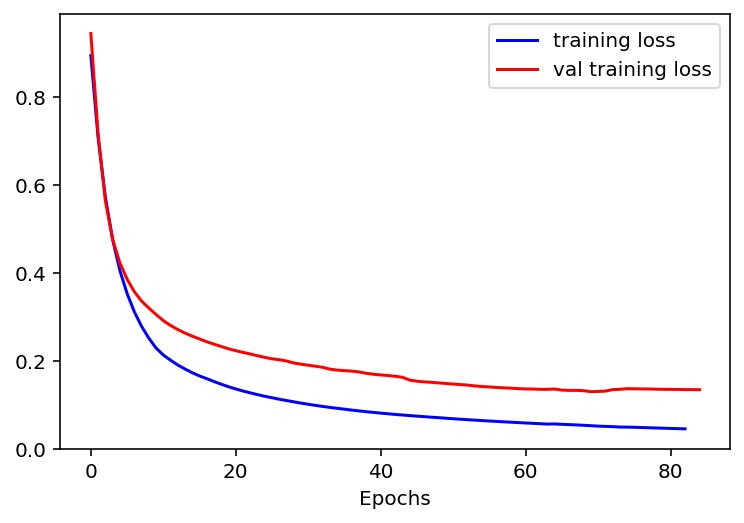

In [31]:
#plot training loss and validation split loss over the epochs. The training loss indicates how well the model is
# fitting the training data, while the validation loss indicates how well the model fits new data. loss = how well our model performs
loss_value= history_dict['loss']
val_loss_values= history_dict['val_loss']
plt.figure()
plt.figure()
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

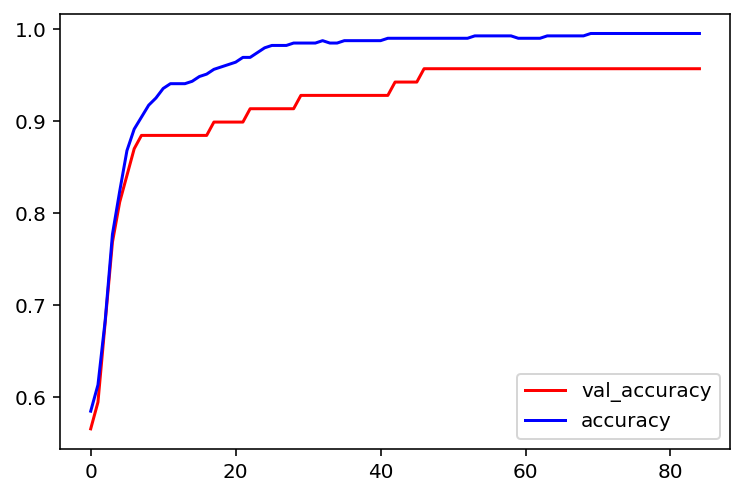

In [30]:
accuracy_values = history_dict['accuracy']
val_accuracy_values=history_dict['val_accuracy']
plt.plot(val_accuracy_values,'-r',label='val_accuracy')
plt.plot(accuracy_values,'-b',label='accuracy')
plt.legend()

In [32]:
#calculate loss and accuracy of the model
loss, accuracy= model.evaluate(X_test, y_test)
print ("Test loss", loss)
print("test accuracy", accuracy)

4/4 [==============================] - 0s 4ms/step - loss: 0.1213 - accuracy: 0.9561
Test loss 0.12130498886108398
test accuracy 0.9561403393745422
